In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline

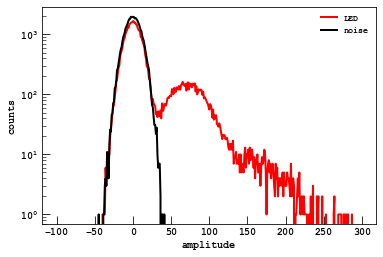

In [8]:
N = 50000 # number of events to simulate
occ = 0.2 # lambda, aka occupancy, aka the mean of the poisson

noise_mu = 0
noise_sigma = 10
LED_mu = 70
LED_sigma = 20

# LED signal looks like noise (gaussian) + LED component (gaussian convolved with poisson)
# noise signal is just the noise part with same mean, sigma
# noise has mean 0, arbitrary sigma
# LED has arbitrary mean, sigma. Just played with numbers til it looked about right
LED_vals = (stats.norm.rvs(loc=noise_mu, scale=noise_sigma, size=N) + 
            stats.norm.rvs(loc=LED_mu, scale=LED_sigma, size=N) * stats.poisson.rvs(occ, size=N))
noise_vals = stats.norm.rvs(loc=noise_mu, scale=noise_sigma, size=N)

# now make histograms
LED, bins = np.histogram(LED_vals, bins=400, range=(-100.5, 299.5))
noise, bins = np.histogram(noise_vals, bins=400, range=(-100.5, 299.5))

bins = 0.5 * (bins[1:] + bins[:-1])

plt.figure()
plt.plot(bins, LED, color='red', label='LED')
plt.plot(bins, noise, color='black', label='noise')
plt.xlabel('amplitude')
plt.ylabel('counts')
plt.yscale('log')
plt.legend()
plt.show()